Dieses Skript visualisiert Anzahl der Dateien mit bestimmten *Sampling Frequenzen*.

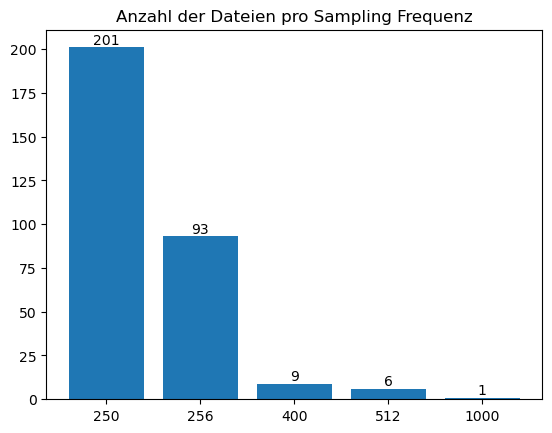

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import pyedflib
import os

sampling_frequencies = []

for root, dirs, files in os.walk('../../../../tuar/edf/'):
    for file in files:
        if file.endswith('.edf'):
            reader = pyedflib.EdfReader(os.path.join(root, file))
            sampling_frequencies.append(reader.getSampleFrequency(0))
            reader.close()

distinct_frequencies = sorted(list(set(sampling_frequencies)))

plt.title("Anzahl der Dateien pro Sampling Frequenz")
container = plt.bar([str(int(freq)) for freq in distinct_frequencies], [sampling_frequencies.count(freq) for freq in distinct_frequencies])
plt.bar_label(container)
plt.show()
plt.savefig("./output/exp_01_04_sampling_frequencies.svg")

- Bemerkungen
    - Es wurde jeweils die Frequenz des ersten Kanals ausgelesen und als Frequenz für alle Kanäle angenommen, da die Labels des ersten Kanals in den Beispielen die Frequenz eines tatsächlichen EEG Kanals waren.

- Notizen
    - Die sehr große Mehrheit der Dateien hat eine Sampling Frequenz von 250 bzw. 256.
    - Insgesamt 16 Dateien haben höhere Frequenz von 400/512/1000.